<a href="https://colab.research.google.com/github/lokeswar777/Sentimental-analysis/blob/main/first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# packages or dependences


In [1]:
# utilities :
import re # regular expression library
import numpy as np
import pandas as pd

# plotting :
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk :
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

# sklearn :
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# time library :
import time

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


100%|██████████| 80.9M/80.9M [00:00<00:00, 120MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2


# Loading dataset from kaggle

In [5]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")
print("Path to dataset files:", path)

# List the files in the downloaded directory
files = os.listdir(path)
print("Files in dataset directory:", files)

# Specify the full path to the CSV file (assuming it's named 'training.1600000.processed.noemoticon.csv')
file_path = os.path.join(path, 'training.1600000.processed.noemoticon.csv')

# Importing the dataset
DATASET_COLUMNS = ['target', 'ids', 'date', 'flag', 'user', 'text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(file_path, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

# Display the first 5 lines
print(df.sample(5))


Path to dataset files: /root/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2
Files in dataset directory: ['training.1600000.processed.noemoticon.csv']
         target         ids                          date      flag  \
899710        4  1693895884  Mon May 04 00:12:20 PDT 2009  NO_QUERY   
1186886       4  1983051504  Sun May 31 12:24:37 PDT 2009  NO_QUERY   
921949        4  1754307546  Sun May 10 05:48:26 PDT 2009  NO_QUERY   
1516756       4  2175758660  Mon Jun 15 01:54:59 PDT 2009  NO_QUERY   
425639        0  2063366921  Sun Jun 07 02:22:20 PDT 2009  NO_QUERY   

                    user                                               text  
899710        minjimouse  School was coole  then went to nickis game. SO...  
1186886  samileighmorris                     on the way to the moviesssss!   
921949        ProfBrendi  Microsoft Tech Ed North America 2009 LA Conven...  
1516756  NJGurlMelissa73  G'm every1 Happy Mon.  Hope everyone had a gr8...  
425639            amo

In [7]:
df.head(7)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug


# Columns

In [8]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

# Shape

In [9]:
df.shape

(1600000, 6)

# Preprocessing

## NULL values

In [10]:
np.sum(df.isnull().any(axis=1))

0

In [11]:
df['target'].unique()

array([0, 4])

In [12]:
df['target'].nunique()

2

* only two target values 0 and 4

In [13]:
df.groupby('target').count()

,ids,date,flag,user,text
target,,,,,
0,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000


* a balanced dataset

# visualing

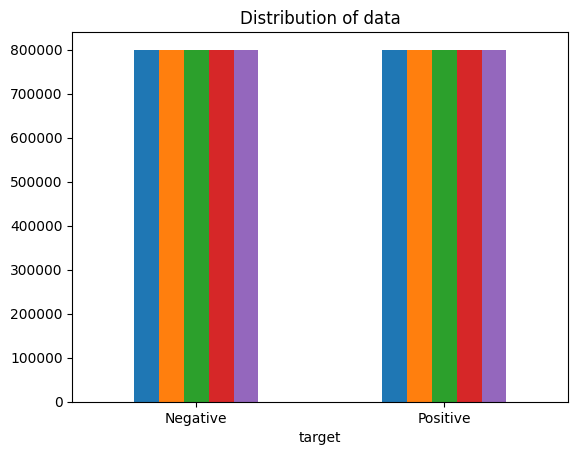

In [15]:
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists :
text, sentiment = list(df['text']), list(df['target'])

* all are same in lenght ( balanced proper dataset

<Axes: xlabel='target', ylabel='count'>

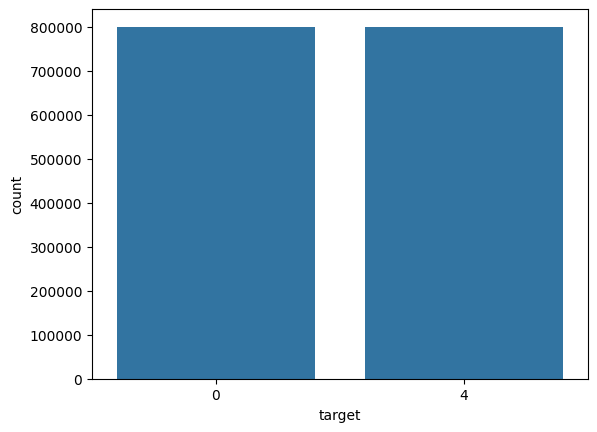

In [16]:
import seaborn as sns
sns.countplot(x='target', data=df)

## Text preprocessing

In [17]:
data = df[['text','target']]

* for our convinence changing target 4 as 1

In [18]:
data['target'] = data['target'].replace(4,1)

<ipython-input-18-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [19]:
data['target'].unique()

array([0, 1])

* seperating positive and negative

In [22]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]


dataset = pd.concat([data_pos, data_neg])

In [23]:
dataset.head()


,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


In [28]:
dataset.iloc[800001]


,1
text,is upset that he can't update his Facebook by ...
target,0


### lowering strings

In [29]:
dataset['text'] = dataset['text'].str.lower()
dataset['text'].tail()

,text
799995,sick spending my day laying in bed listening ...
799996,gmail is down?
799997,rest in peace farrah! so sad
799998,@eric_urbane sounds like a rival is flagging y...
799999,has to resit exams over summer... wishes he w...


In [30]:
# Defining set containing all stopwords in English :
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before',
                'being', 'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do',
                'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from',
                'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                'into', 'is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'on', 'once',
                'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'own', 're',
                's', 'same', 'she', "shes", 'should', "shouldve", 'so', 'some', 'such',
                't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
                'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was',
                'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom',
                'why', 'will', 'with', 'won', 'y', 'you', "youd", "youll", "youre",
                "youve", 'your', 'yours', 'yourself', 'yourselves']


In [31]:
STOPWORDS = set(stopwordlist)


def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

,text
800000,love @health4uandpets u guys r best!!
800001,im meeting one besties tonight! cant wait!! - ...
800002,"@darealsunisakim thanks twitter add, sunisa! g..."
800003,sick really cheap hurts much eat real food plu...
800004,@lovesbrooklyn2 effect everyone


In [32]:
import string

english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

,text
799995,sick spending day laying bed listening taylors...
799996,gmail down
799997,rest peace farrah sad
799998,ericurbane sounds like rival flagging ads not ...
799999,resit exams over summer wishes worked harder f...


In [33]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

,text
799995,sick spending day laying bed listening taylors...
799996,gmail down
799997,rest peace farrah sad
799998,ericurbane sounds like rival flagging ads not ...
799999,resit exams over summer wishes worked harder f...


In [34]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

,text
799995,sick spending day laying bed listening taylors...
799996,gmail down
799997,rest peace farrah sad
799998,ericurbane sounds like rival flagging ads not ...
799999,resit exams over summer wishes worked harder f...


In [35]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

,text
799995,sick spending day laying bed listening taylorswif
799996,gmail down
799997,rest peace farrah sad
799998,ericurbane sounds like rival flagging ads not ...
799999,resit exams over summer wishes worked harder f...


In [37]:
import nltk
nltk.download('punkt_tab')
dataset['text'] = dataset['text'].apply(word_tokenize)
dataset['text'].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text
800000,"[love, healthuandpets, u, guys, r, best]"
800001,"[im, meeting, one, besties, tonight, cant, wai..."
800002,"[darealsunisakim, thanks, twitter, add, sunisa..."
800003,"[sick, really, cheap, hurts, much, eat, real, ..."
800004,"[lovesbrooklyn, effect, everyone]"


In [38]:
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

,text
800000,"[love, healthuandpets, u, guys, r, best]"
800001,"[im, meeting, one, besties, tonight, cant, wai..."
800002,"[darealsunisakim, thanks, twitter, add, sunisa..."
800003,"[sick, really, cheap, hurts, much, eat, real, ..."
800004,"[lovesbrooklyn, effect, everyone]"


In [ ]:
lm = nltk.WordNetLemmatizer()


def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

# Splitting data

In [ ]:
X = data.text
y = data.target

In [ ]:
data_neg = data['text'][:800000] # selecting the negative tweets.
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
data_pos = data['text'][800000:]  # selecting the positive tweets.
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_pos))
plt.figure(figsize=(20, 20))
plt.imshow(wc)

# Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=26105111)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
X_test

In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
BNBmodel = BernoulliNB()
start = time.time()
BNBmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [ ]:
# Plot the ROC-AUC Curve for model-1 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Model-2 : SVM (Support Vector Machine).
SVCmodel = LinearSVC()
start = time.time()
SVCmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

In [ ]:
# Plot the ROC-AUC Curve for model-2 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Model-3 : Logistic Regression.
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start = time.time()
LRmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [ ]:
# Plot the ROC-AUC Curve for model-3 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()